In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import netCDF4 as nc
import os
import gc

In [4]:
def load(months):
    res = np.load(f'data/interpolated/{months[0]:02d}.npy')
    if len(months) > 1:
        for m in range(1, len(months)):
            data = np.load(f'data/interpolated/{months[m]:02d}.npy')
            res = np.concatenate((res, data), axis=0)
            
    return res

In [6]:
spc = 0.5

nX = np.arange(0+(spc/2),360, spc)

meop_data = load([ 10, 11, 12, 1, 2, 3])
meop_data = meop_data[meop_data[:,2] < -400, :] 

meanT_Summer = []
for i in np.arange(-180, 180, spc):
    flags = np.logical_and(meop_data[:, 1] >= i, meop_data[:, 1] < i+spc)
    subset = meop_data[flags, :]
    meanT_Summer.append(np.nanmean(subset[:,4]))
    
meanT_Summer = meanT_Summer[int(len(nX)/2):] + meanT_Summer[:int(len(nX)/2)]


meop_data = load([4, 5, 6, 7, 8, 9])
meop_data = meop_data[meop_data[:,2] < -400, :] 

meanT_Winter = []
for i in np.arange(-180, 180, spc):
    flags = np.logical_and(meop_data[:, 1] >= i, meop_data[:, 1] < i+spc)
    subset = meop_data[flags, :]
    meanT_Winter.append(np.nanmean(subset[:,4]))
    
meanT_Winter = meanT_Winter[int(len(nX)/2):] + meanT_Winter[:int(len(nX)/2)]

/tmp/ipykernel_798028/2891656536.py:12: RuntimeWarning: Mean of empty slice
  meanT_Summer.append(np.nanmean(subset[:,4]))
/tmp/ipykernel_798028/2891656536.py:24: RuntimeWarning: Mean of empty slice
  meanT_Winter.append(np.nanmean(subset[:,4]))


In [10]:
def smooth(n, by=10):
    res = []
    count = 0
    temp = []
    for i in n:
        temp.append(i)
        
        if len(temp) < by:
            res.append(i)
        elif len(temp) == by:
            res.append(np.nanmean(temp))
        else:
            temp.pop(0)
            res.append(np.nanmean(temp))
            
    return np.asarray(res)

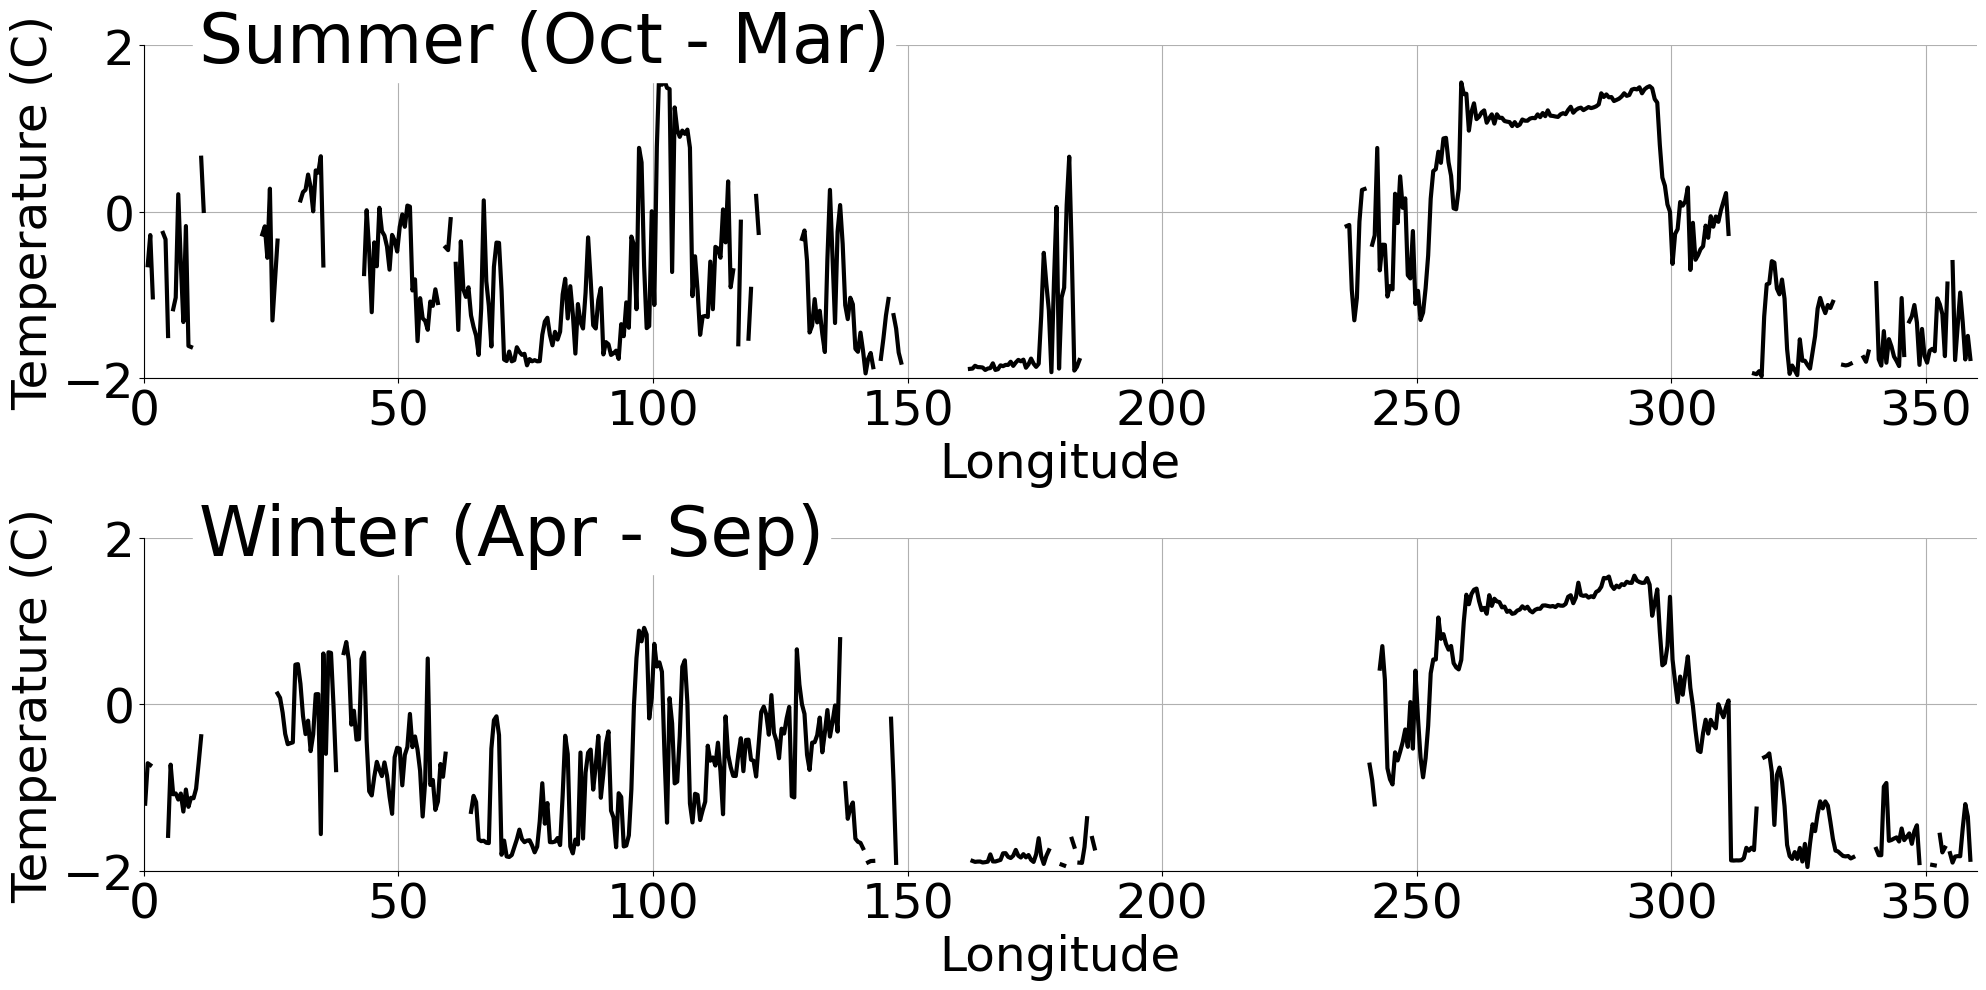

In [8]:
fig, ax = plt.subplots(nrows=2, figsize=(20,10))
ax[0].plot(nX, meanT_Summer, c='k', lw=3, label='Summer (Oct - Mar)')
ax[1].plot(nX, meanT_Winter, c='k', lw=3, label = 'Winter (Apr - Sep)')

for a in ax.flat:

    a.spines['left'].set_position('zero')
    a.spines['right'].set_color('none')
    a.yaxis.tick_left()
#     a.spines['bottom'].set_position('zero')
    a.spines['top'].set_color('none')
    a.xaxis.tick_bottom()

    a.set_xlim(0,360)
    a.grid()
    a.tick_params(axis='both', labelsize=35)
    a.set_xlabel('Longitude', fontsize=35)
    a.set_ylabel('Temperature (C)', fontsize=35)

    a.set_ylim(-2, 2)
    
    
ax[0].annotate(f'Summer (Oct - Mar)', (0.03, 0.95), 
            xycoords= 'axes fraction', fontsize=50, backgroundcolor='w', c='k')
ax[1].annotate(f'Winter (Apr - Sep)', (0.03, 0.95), 
            xycoords= 'axes fraction', fontsize=50, backgroundcolor='w', c='k')
plt.tight_layout()


plt.savefig('Summer_vs_Winter.png', dpi=300)

/tmp/ipykernel_798028/3080387309.py:14: RuntimeWarning: Mean of empty slice
  res.append(np.nanmean(temp))


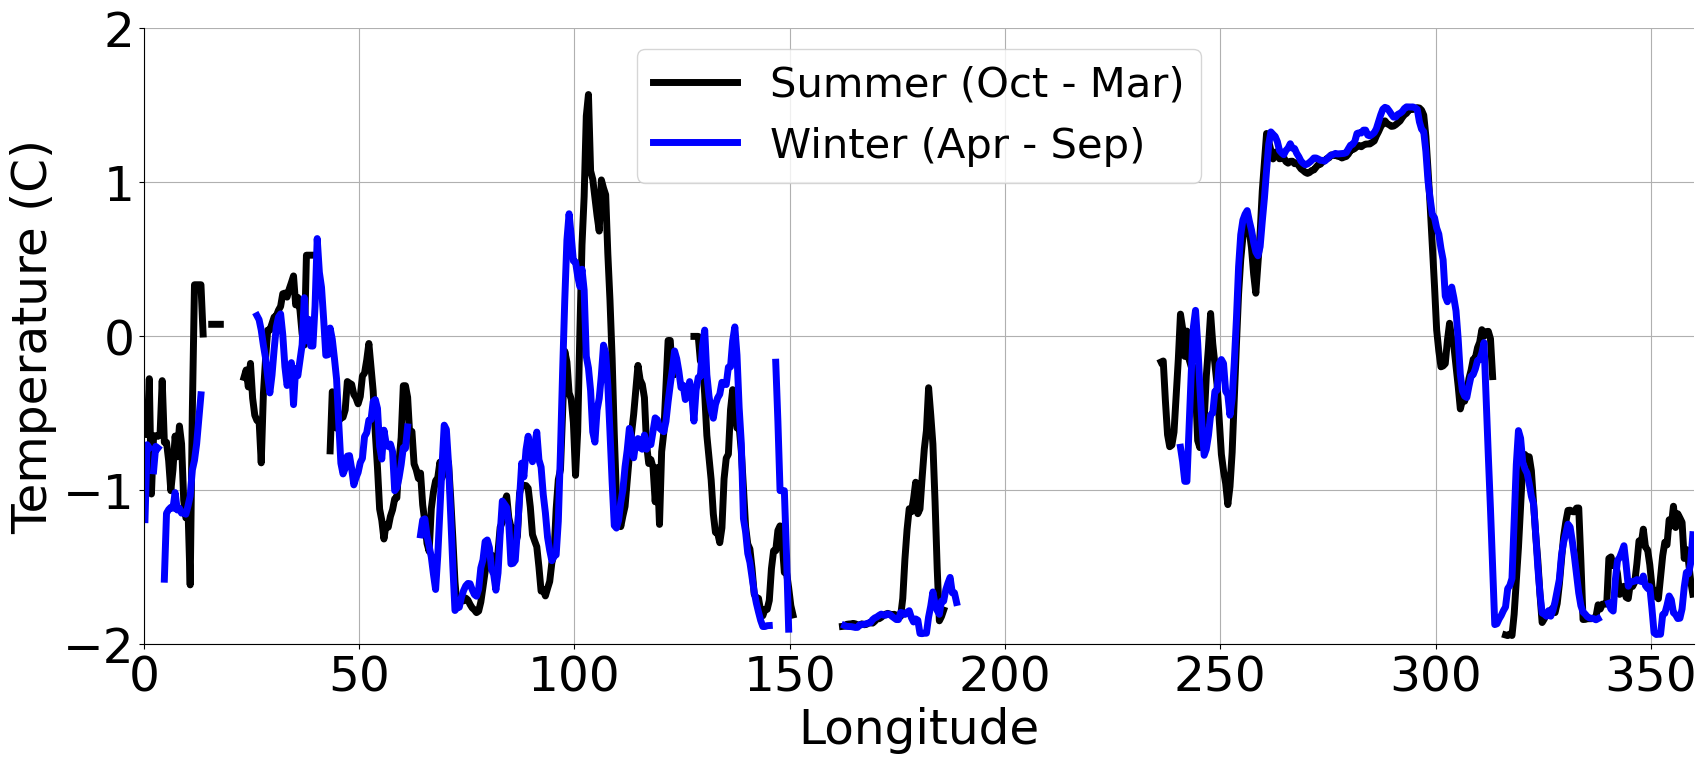

In [11]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(nX, smooth(meanT_Summer,by=5), c='k', lw=5, label='Summer (Oct - Mar)')
ax.plot(nX, smooth(meanT_Winter, by=5), c='blue', lw=5, label = 'Winter (Apr - Sep)')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

ax.set_xlim(0,360)
ax.grid()
ax.tick_params(axis='both', labelsize=35)
ax.set_xlabel('Longitude', fontsize=35)
ax.set_ylabel('Temperature (C)', fontsize=35)

ax.set_ylim(-2, 2)
ax.legend(fontsize=30)

plt.savefig('Summer_vs_Winter_JOINT.jpg', dpi=300)